In [2]:
# importing packages
import pandas as pd
import glob,os
import seaborn as sns
import matplotlib.pyplot as plt
folder_path = './Thesis'
file_list = glob.glob(folder_path + "/*.tsv")
main_dataframe = pd.DataFrame([])

for i in file_list:
    data = pd.read_csv(i,delimiter="\t",index_col=0)
    df=data[['tpm']]
    df['Run'] = os.path.basename(i).split('_')[0]
    main_dataframe = pd.concat([main_dataframe,df],axis=0)
main_dataframe = main_dataframe.rename_axis('Transcript').reset_index()
main_dataframe 

C:\Users\paulo\AppData\Local\Temp\ipykernel_9668\1403092225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Run'] = os.path.basename(i).split('_')[0]
C:\Users\paulo\AppData\Local\Temp\ipykernel_9668\1403092225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Run'] = os.path.basename(i).split('_')[0]
C:\Users\paulo\AppData\Local\Temp\ipykernel_9668\1403092225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Transcript,tpm,Run
0,ENST00000632684.1,0.0,SRR8758292
1,ENST00000434970.2,0.0,SRR8758292
2,ENST00000448914.1,0.0,SRR8758292
3,ENST00000415118.1,0.0,SRR8758292
4,ENST00000631435.1,0.0,SRR8758292
...,...,...,...
1125751,ENST00000639790.1,0.0,SRR8758297
1125752,ENST00000639660.1,0.0,SRR8758297
1125753,ENST00000643577.1,0.0,SRR8758297
1125754,ENST00000646356.1,0.0,SRR8758297


In [3]:
#join metadata
metadata=pd.read_table('./bed files/metadata.txt',delimiter=',')
df=pd.merge(main_dataframe, metadata[["Run", "Genotype"]], on="Run")
df['Transcript'] = df['Transcript'].str[:15]
df2=df[['Transcript']]
df2.to_csv('./Thesis/transcript_name_isoforms_analysis.txt',index=False)
df

,Transcript,tpm,Run,Genotype
0,ENST00000632684,0.0,SRR8758292,FOXO1A3 overexpression
1,ENST00000434970,0.0,SRR8758292,FOXO1A3 overexpression
2,ENST00000448914,0.0,SRR8758292,FOXO1A3 overexpression
3,ENST00000415118,0.0,SRR8758292,FOXO1A3 overexpression
4,ENST00000631435,0.0,SRR8758292,FOXO1A3 overexpression
...,...,...,...,...
1125751,ENST00000639790,0.0,SRR8758297,control
1125752,ENST00000639660,0.0,SRR8758297,control
1125753,ENST00000643577,0.0,SRR8758297,control
1125754,ENST00000646356,0.0,SRR8758297,control


In [4]:
Transcript_name=pd.read_csv('./Thesis/transcript_name_isoforms_analysis_ensembl_result.txt',sep='\t')
Transcript_name
df.rename(columns = {'Transcript':'Transcript stable ID'}, inplace = True)
isoforms=pd.merge(df,Transcript_name, on='Transcript stable ID',how='inner')
isoforms

,Transcript stable ID,tpm,Run,Genotype,Gene stable ID,Gene name,Transcript name
0,ENST00000632684,0.0,SRR8758292,FOXO1A3 overexpression,ENSG00000282431,TRBD1,TRBD1-202
1,ENST00000632684,0.0,SRR8758293,FOXO1A3 overexpression,ENSG00000282431,TRBD1,TRBD1-202
2,ENST00000632684,0.0,SRR8758294,FOXO1A3 overexpression,ENSG00000282431,TRBD1,TRBD1-202
3,ENST00000632684,0.0,SRR8758295,control,ENSG00000282431,TRBD1,TRBD1-202
4,ENST00000632684,0.0,SRR8758296,control,ENSG00000282431,TRBD1,TRBD1-202
...,...,...,...,...,...,...,...
1095031,ENST00000645792,0.0,SRR8758293,FOXO1A3 overexpression,ENSG00000284949,OR2A12,OR2A12-203
1095032,ENST00000645792,0.0,SRR8758294,FOXO1A3 overexpression,ENSG00000284949,OR2A12,OR2A12-203
1095033,ENST00000645792,0.0,SRR8758295,control,ENSG00000284949,OR2A12,OR2A12-203
1095034,ENST00000645792,0.0,SRR8758296,control,ENSG00000284949,OR2A12,OR2A12-203


In [5]:
#ODF2
rslt_df1 = isoforms.loc[isoforms['Gene name'] == 'ODF2']
rslt_205=rslt_df1[rslt_df1['Transcript name'] == 'ODF2-205']
rslt_210=rslt_df1[rslt_df1['Transcript name'] == 'ODF2-210']
rslt_df1=pd.concat([rslt_205, rslt_210])
rslt_df1

,Transcript stable ID,tpm,Run,Genotype,Gene stable ID,Gene name,Transcript name
152724,ENST00000393527,2.693870,SRR8758292,FOXO1A3 overexpression,ENSG00000136811,ODF2,ODF2-205
152725,ENST00000393527,2.526290,SRR8758293,FOXO1A3 overexpression,ENSG00000136811,ODF2,ODF2-205
152726,ENST00000393527,2.243830,SRR8758294,FOXO1A3 overexpression,ENSG00000136811,ODF2,ODF2-205
152727,ENST00000393527,7.143440,SRR8758295,control,ENSG00000136811,ODF2,ODF2-205
152728,ENST00000393527,6.652830,SRR8758296,control,ENSG00000136811,ODF2,ODF2-205
152729,ENST00000393527,9.250570,SRR8758297,control,ENSG00000136811,ODF2,ODF2-205
152772,ENST00000444119,0.856401,SRR8758292,FOXO1A3 overexpression,ENSG00000136811,ODF2,ODF2-210
152773,ENST00000444119,2.410550,SRR8758293,FOXO1A3 overexpression,ENSG00000136811,ODF2,ODF2-210
152774,ENST00000444119,0.996674,SRR8758294,FOXO1A3 overexpression,ENSG00000136811,ODF2,ODF2-210
152775,ENST00000444119,0.000000,SRR8758295,control,ENSG00000136811,ODF2,ODF2-210


In [6]:
#FOXRED1
rslt_df2 = isoforms.loc[isoforms['Gene name'] == 'FOXRED1']
rslt_204=rslt_df2[rslt_df2['Transcript name'] == 'FOXRED1-204']
rslt_214=rslt_df2[rslt_df2['Transcript name'] == 'FOXRED1-214']
rslt_df2=pd.concat([rslt_204, rslt_214])
rslt_df2

,Transcript stable ID,tpm,Run,Genotype,Gene stable ID,Gene name,Transcript name
816348,ENST00000525770,1.933030e+00,SRR8758292,FOXO1A3 overexpression,ENSG00000110074,FOXRED1,FOXRED1-204
816349,ENST00000525770,1.752340e+00,SRR8758293,FOXO1A3 overexpression,ENSG00000110074,FOXRED1,FOXRED1-204
816350,ENST00000525770,2.248920e+00,SRR8758294,FOXO1A3 overexpression,ENSG00000110074,FOXRED1,FOXRED1-204
816351,ENST00000525770,1.037770e-08,SRR8758295,control,ENSG00000110074,FOXRED1,FOXRED1-204
816352,ENST00000525770,0.000000e+00,SRR8758296,control,ENSG00000110074,FOXRED1,FOXRED1-204
816353,ENST00000525770,0.000000e+00,SRR8758297,control,ENSG00000110074,FOXRED1,FOXRED1-204
816414,ENST00000532590,0.000000e+00,SRR8758292,FOXO1A3 overexpression,ENSG00000110074,FOXRED1,FOXRED1-214
816415,ENST00000532590,0.000000e+00,SRR8758293,FOXO1A3 overexpression,ENSG00000110074,FOXRED1,FOXRED1-214
816416,ENST00000532590,3.916520e-02,SRR8758294,FOXO1A3 overexpression,ENSG00000110074,FOXRED1,FOXRED1-214
816417,ENST00000532590,2.731130e+00,SRR8758295,control,ENSG00000110074,FOXRED1,FOXRED1-214


In [7]:
#RPS27L
rslt_df3 = isoforms.loc[isoforms['Gene name'] == 'RPS27L']
rslt_204=rslt_df3[rslt_df3['Transcript name'] == 'RPS27L-204']
rslt_205=rslt_df3[rslt_df3['Transcript name'] == 'RPS27L-205']
rslt_df3=pd.concat([rslt_204, rslt_205])
rslt_df3

,Transcript stable ID,tpm,Run,Genotype,Gene stable ID,Gene name,Transcript name
8514,ENST00000455271,23.52080,SRR8758292,FOXO1A3 overexpression,ENSG00000185088,RPS27L,RPS27L-204
8515,ENST00000455271,25.04560,SRR8758293,FOXO1A3 overexpression,ENSG00000185088,RPS27L,RPS27L-204
8516,ENST00000455271,30.85390,SRR8758294,FOXO1A3 overexpression,ENSG00000185088,RPS27L,RPS27L-204
8517,ENST00000455271,1.19360,SRR8758295,control,ENSG00000185088,RPS27L,RPS27L-204
8518,ENST00000455271,1.94388,SRR8758296,control,ENSG00000185088,RPS27L,RPS27L-204
8519,ENST00000455271,1.66617,SRR8758297,control,ENSG00000185088,RPS27L,RPS27L-204
8508,ENST00000462430,6.91979,SRR8758292,FOXO1A3 overexpression,ENSG00000185088,RPS27L,RPS27L-205
8509,ENST00000462430,13.31280,SRR8758293,FOXO1A3 overexpression,ENSG00000185088,RPS27L,RPS27L-205
8510,ENST00000462430,17.96770,SRR8758294,FOXO1A3 overexpression,ENSG00000185088,RPS27L,RPS27L-205
8511,ENST00000462430,109.99000,SRR8758295,control,ENSG00000185088,RPS27L,RPS27L-205


In [8]:
#YIPF1
rslt_df4 = isoforms.loc[isoforms['Gene name'] == 'YIPF1']
rslt_201=rslt_df4[rslt_df4['Transcript name'] == 'YIPF1-201']
rslt_202=rslt_df4[rslt_df4['Transcript name'] == 'YIPF1-202']
rslt_203=rslt_df4[rslt_df4['Transcript name'] == 'YIPF1-203']
rslt_206=rslt_df4[rslt_df4['Transcript name'] == 'YIPF1-206']
rslt_df4=pd.concat([rslt_201, rslt_202,rslt_203,rslt_206])
rslt_df4

,Transcript stable ID,tpm,Run,Genotype,Gene stable ID,Gene name,Transcript name
602382,ENST00000072644,4.232120e+01,SRR8758292,FOXO1A3 overexpression,ENSG00000058799,YIPF1,YIPF1-201
602383,ENST00000072644,3.743850e+01,SRR8758293,FOXO1A3 overexpression,ENSG00000058799,YIPF1,YIPF1-201
602384,ENST00000072644,4.472750e+01,SRR8758294,FOXO1A3 overexpression,ENSG00000058799,YIPF1,YIPF1-201
602385,ENST00000072644,3.596150e+00,SRR8758295,control,ENSG00000058799,YIPF1,YIPF1-201
602386,ENST00000072644,8.872290e-01,SRR8758296,control,ENSG00000058799,YIPF1,YIPF1-201
602387,ENST00000072644,2.107960e+00,SRR8758297,control,ENSG00000058799,YIPF1,YIPF1-201
602376,ENST00000371399,4.839860e-08,SRR8758292,FOXO1A3 overexpression,ENSG00000058799,YIPF1,YIPF1-202
602377,ENST00000371399,8.108790e-09,SRR8758293,FOXO1A3 overexpression,ENSG00000058799,YIPF1,YIPF1-202
602378,ENST00000371399,1.539030e-04,SRR8758294,FOXO1A3 overexpression,ENSG00000058799,YIPF1,YIPF1-202
602379,ENST00000371399,3.057870e+00,SRR8758295,control,ENSG00000058799,YIPF1,YIPF1-202


In [9]:
#ZNF518A
rslt_df5 = isoforms.loc[isoforms['Gene name'] == 'ZNF518A']
rslt_208=rslt_df5[rslt_df5['Transcript name'] == 'ZNF518A-208']
rslt_209=rslt_df5[rslt_df5['Transcript name'] == 'ZNF518A-209']
rslt_df5=pd.concat([rslt_208, rslt_209])
rslt_df5

,Transcript stable ID,tpm,Run,Genotype,Gene stable ID,Gene name,Transcript name
899874,ENST00000614149,7.951450e-08,SRR8758292,FOXO1A3 overexpression,ENSG00000177853,ZNF518A,ZNF518A-208
899875,ENST00000614149,4.600410e-03,SRR8758293,FOXO1A3 overexpression,ENSG00000177853,ZNF518A,ZNF518A-208
899876,ENST00000614149,7.697290e-03,SRR8758294,FOXO1A3 overexpression,ENSG00000177853,ZNF518A,ZNF518A-208
899877,ENST00000614149,5.192430e-01,SRR8758295,control,ENSG00000177853,ZNF518A,ZNF518A-208
899878,ENST00000614149,4.244640e-01,SRR8758296,control,ENSG00000177853,ZNF518A,ZNF518A-208
899879,ENST00000614149,3.328000e-01,SRR8758297,control,ENSG00000177853,ZNF518A,ZNF518A-208
899868,ENST00000624776,1.554610e+00,SRR8758292,FOXO1A3 overexpression,ENSG00000177853,ZNF518A,ZNF518A-209
899869,ENST00000624776,1.399230e+00,SRR8758293,FOXO1A3 overexpression,ENSG00000177853,ZNF518A,ZNF518A-209
899870,ENST00000624776,9.852940e-01,SRR8758294,FOXO1A3 overexpression,ENSG00000177853,ZNF518A,ZNF518A-209
899871,ENST00000624776,2.930770e-07,SRR8758295,control,ENSG00000177853,ZNF518A,ZNF518A-209


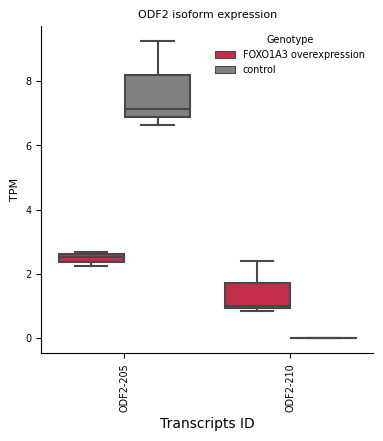

In [10]:
colors=['crimson','GREY']
sns.catplot(x="Transcript name", y="tpm", hue="Genotype",kind="box", data=rslt_df1,palette=colors,height=4,legend=False)
plt.legend(ncol = 1, title = 'Genotype', title_fontsize = 7,
           loc = 0, bbox_to_anchor = (1, 1), frameon= False, fontsize = 7);
plt.title('ODF2 isoform expression', fontsize = 8)
plt.ylabel('TPM', fontsize = 8);
plt.xlabel('Transcripts ID')
plt.xticks(rotation = 90, fontsize = 7, ha="center");
plt.yticks(fontsize = 8);
plt.tick_params(axis = 'y', labelsize = 7)
plt.savefig('Isoforms_ODF2_ylabel_and_title=8_ legend_and_xticks_and_tickparams=7.png',bbox_inches='tight', format='png', dpi=600)
plt.show()

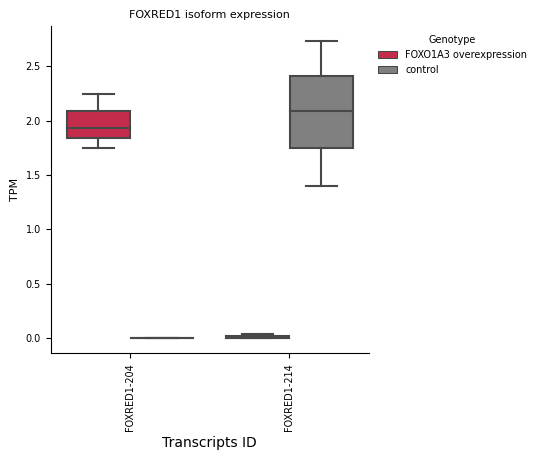

In [11]:
colors=['crimson','GREY']
sns.catplot(x="Transcript name", y="tpm", hue="Genotype",kind="box", data=rslt_df2,palette=colors,height=4,legend=False)
plt.legend(ncol = 1, title = 'Genotype', title_fontsize = 7,
           loc = 0, bbox_to_anchor = (1, 1), frameon= False, fontsize = 7);
plt.title('FOXRED1 isoform expression', fontsize = 8)
plt.ylabel('TPM', fontsize = 8);
plt.xlabel('Transcripts ID')
plt.xticks(rotation = 90, fontsize = 7, ha="center");
plt.yticks(fontsize = 8);
plt.tick_params(axis = 'y', labelsize = 7)
plt.show()

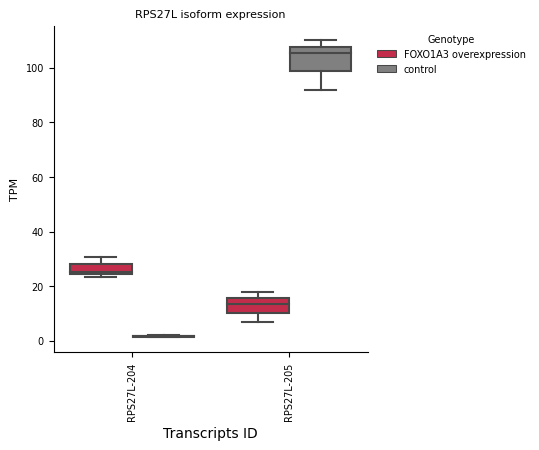

In [12]:
colors=['crimson','GREY']
sns.catplot(x="Transcript name", y="tpm", hue="Genotype",kind="box", data=rslt_df3,palette=colors,height=4,legend=False)
plt.legend(ncol = 1, title = 'Genotype', title_fontsize = 7,
           loc = 0, bbox_to_anchor = (1, 1), frameon= False, fontsize = 7);
plt.title('RPS27L isoform expression', fontsize = 8)
plt.ylabel('TPM', fontsize = 8);
plt.xlabel('Transcripts ID')
plt.xticks(rotation = 90, fontsize = 7, ha="center");
plt.yticks(fontsize = 8);
plt.tick_params(axis = 'y', labelsize = 7)
plt.savefig('Isoforms_RPS27L_ylabel_and_title=8_ legend_and_xticks_and_tickparams=7.png',bbox_inches='tight', format='png', dpi=600)
plt.show()


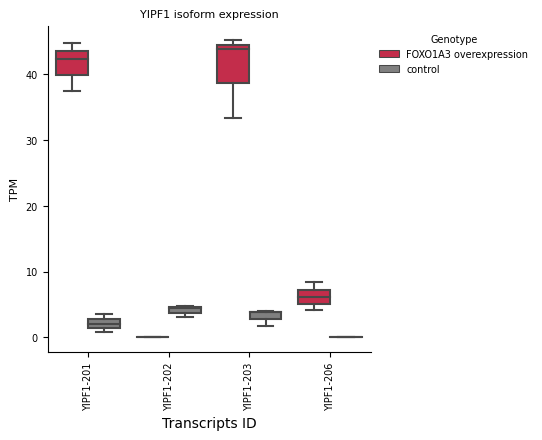

In [13]:
colors=['crimson','GREY']
sns.catplot(x="Transcript name", y="tpm", hue="Genotype",kind="box", data=rslt_df4,palette=colors,height=4,legend=False)
plt.legend(ncol = 1, title = 'Genotype', title_fontsize = 7,
           loc = 0, bbox_to_anchor = (1, 1), frameon= False, fontsize = 7);
plt.title('YIPF1 isoform expression', fontsize = 8)
plt.ylabel('TPM', fontsize = 8);
plt.xlabel('Transcripts ID')
plt.xticks(rotation = 90, fontsize = 7, ha="center");
plt.yticks(fontsize = 8);
plt.tick_params(axis = 'y', labelsize = 7)
plt.show()

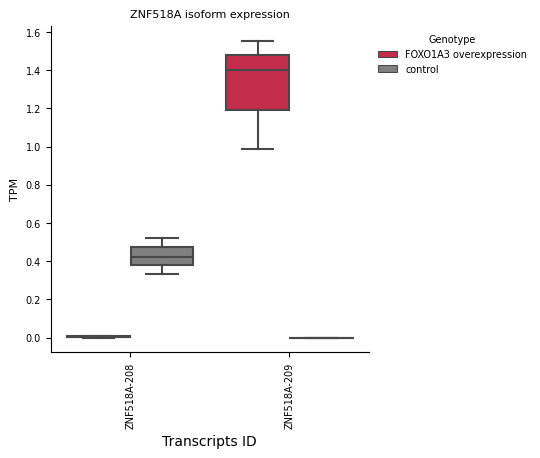

In [14]:
colors=['crimson','GREY']
sns.catplot(x="Transcript name", y="tpm", hue="Genotype",kind="box", data=rslt_df5,palette=colors,height=4,legend=False)
plt.legend(ncol = 1, title = 'Genotype', title_fontsize = 7,
           loc = 0, bbox_to_anchor = (1, 1), frameon= False, fontsize = 7);
plt.title('ZNF518A isoform expression', fontsize = 8)
plt.ylabel('TPM', fontsize = 8);
plt.xlabel('Transcripts ID')
plt.xticks(rotation = 90, fontsize = 7, ha="center");
plt.yticks(fontsize = 8);
plt.tick_params(axis = 'y', labelsize = 7)
plt.show()

C:\Users\paulo\AppData\Local\Temp\ipykernel_9668\2664670142.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Isoforms_VEGFA_ylabel_and_title=8_ legend_and_xticks_and_tickparams=7.png',bbox_inches='tight', format='png', dpi=600,figsize=(10,10))


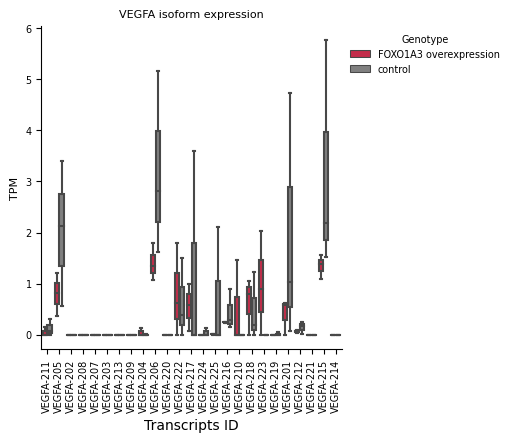

In [18]:
#VEGFA
rslt_df12 = isoforms.loc[isoforms['Gene name'] == 'VEGFA']
rslt_df12
colors=['crimson','GREY']
sns.catplot(x="Transcript name", y="tpm", hue="Genotype",kind="box", data=rslt_df12,palette=colors,height=4,legend=False)
plt.legend(ncol = 1, title = 'Genotype', title_fontsize = 7,
           loc = 0, bbox_to_anchor = (1, 1), frameon= False, fontsize = 7);
plt.title('VEGFA isoform expression', fontsize = 8)
plt.ylabel('TPM', fontsize = 8);
plt.xlabel('Transcripts ID')
plt.xticks(rotation = 90, fontsize = 7, ha="center");
plt.yticks(fontsize = 8);
plt.tick_params(axis = 'y', labelsize = 7)
plt.savefig('Isoforms_VEGFA_ylabel_and_title=8_ legend_and_xticks_and_tickparams=7.png',bbox_inches='tight', format='png', dpi=600,figsize=(10,10))
plt.show()